In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('kc_house_data.csv')

In [2]:
df_sample = df.sample(n=10000,random_state=3)
df_sample.dropna(inplace=True)

In [3]:
df_sample = df_sample[~df_sample.sqft_basement.str.contains('?', regex=False)]
df_sample = df_sample.loc[df_sample['price'] <=3000000]
target = df_sample['price']
df_sample = df_sample.drop(columns=('price'))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


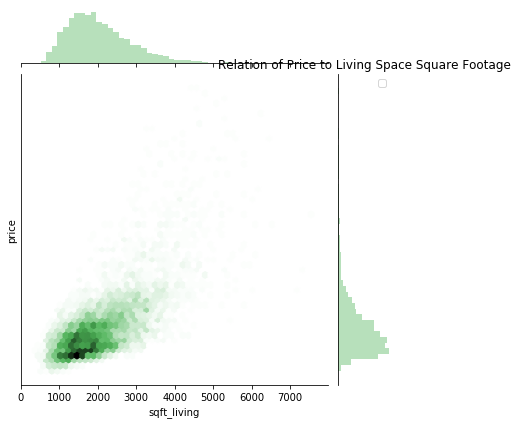

In [4]:
sns.jointplot(x=df_sample['sqft_living'], y=target, kind="hex", color="#4CB356")
plt.title('Relation of Price to Living Space Square Footage')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


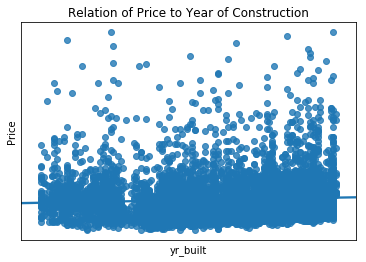

In [5]:
sns.regplot(x=df_sample['yr_built'], y=target, data=df_sample)
plt.ylabel('Price')
plt.xlabel('yr_built')
plt.title('Relation of Price to Year of Construction')
plt.xticks([])
plt.yticks([])
plt.savefig('scatter.png')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


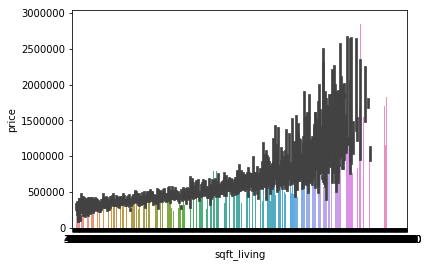

In [13]:
sns.barplot(df.sqft_living, target)

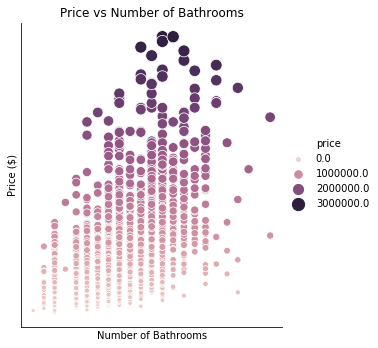

In [6]:
dfall = df_sample.join(target)
sns.relplot(x='bathrooms', y='price', hue = 'price', size = 'price', sizes = (15, 150), data = dfall)
plt.ylabel('Price ($)')
plt.xlabel('Number of Bathrooms')
plt.title('Price vs Number of Bathrooms')
plt.xticks([])
plt.yticks([])
plt.savefig('sqft.png')

In [ ]:
bins = [0, 3, 4 , 5, 24]

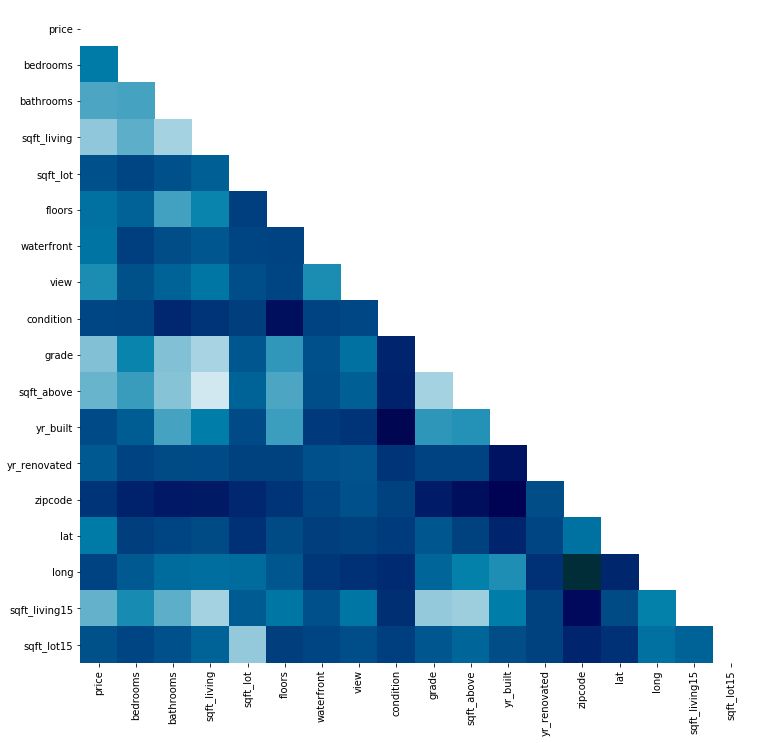

In [7]:
# seaborn heatmap with correlations:
corr = df.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (12,12))
sns.heatmap(corr, center=0, mask=mask, cmap='ocean', cbar=False)
plt.savefig('heatmap.png')

In [8]:
df.lat.max()

47.7776

In [9]:
df.loc[df['lat'] == 47.1559]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3292,9413400165,6/24/2014,380000.0,3,2.25,1860,15559,2.0,0.0,0.0,...,7,1860,0.0,1963,0.0,98022,47.1559,-121.646,1110,11586
